In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Question 2

# part2

In [27]:
def calc_hist(image):
    '''
    Do not use libraries
    calculate image histogram
    input(s):
      image (ndarray): input image
    output(s):
      hist (ndarray): computed input image histogram
    '''
    hist = np.zeros(256,dtype=int)

    #######################
    #    your code here   #

    hist = np.bincount(image.flatten(),minlength = 256)


    #######################

    return hist

In [28]:
def calc_cdf(channel):
  '''
    Do not use libraries
    calculate image cdf
    input(s):
      channel (ndarray): input image channel
    output(s):
      cdf (ndarray): computed cdf for input image channel
  '''

  #######################
  #    your code here   #
  cdf = np.zeros(256, dtype=int)
  hist = calc_hist(channel)
  cumulative_sum = 0
  for i in range(0, 256):
    cumulative_sum += hist[i]
    cdf[i] = cumulative_sum / len(channel)
  # cdf = hist.cumsum()
  #######################

  return cdf

In [29]:
def hist_matching(src_image,ref_image):
  '''
  don't use libraries
  input(s):
    src_image (ndarray): source image
    ref_image (ndarray): reference image
  output(s):
    output_image (ndarray): transformation of source image so that its histogram matches histogram of refrence image
  '''
  output_image = src_image.copy()
  channels = [(0, 'Blue channel'), (1, 'Green channel'), (2, 'Red channel')]
  for channel, title in channels:

    #######################
    #    your code here   #
    src_hist = np.zeros(256, dtype=int)
    ref_hist = np.zeros(256, dtype=int)

    for pixel_value in src_image[:, :, channel].flatten():
        src_hist[pixel_value] += 1
    for pixel_value in ref_image[:, :, channel].flatten():
        ref_hist[pixel_value] += 1
    src_cdf = src_hist.cumsum()
    ref_cdf = ref_hist.cumsum()
    src_cdf = src_cdf / src_cdf[-1]
    ref_cdf = ref_cdf / ref_cdf[-1]
    mapping = np.zeros(256, dtype=np.uint8)
    j = 0
    for i in range(256):
        while j < 256 and src_cdf[i] > ref_cdf[j]:
            j += 1
        if j < 256:
            mapping[i] = j
    mapped_channel = mapping[src_image[:, :, channel]]
    output_image[:, :, channel] = mapped_channel
    #######################

  return output_image

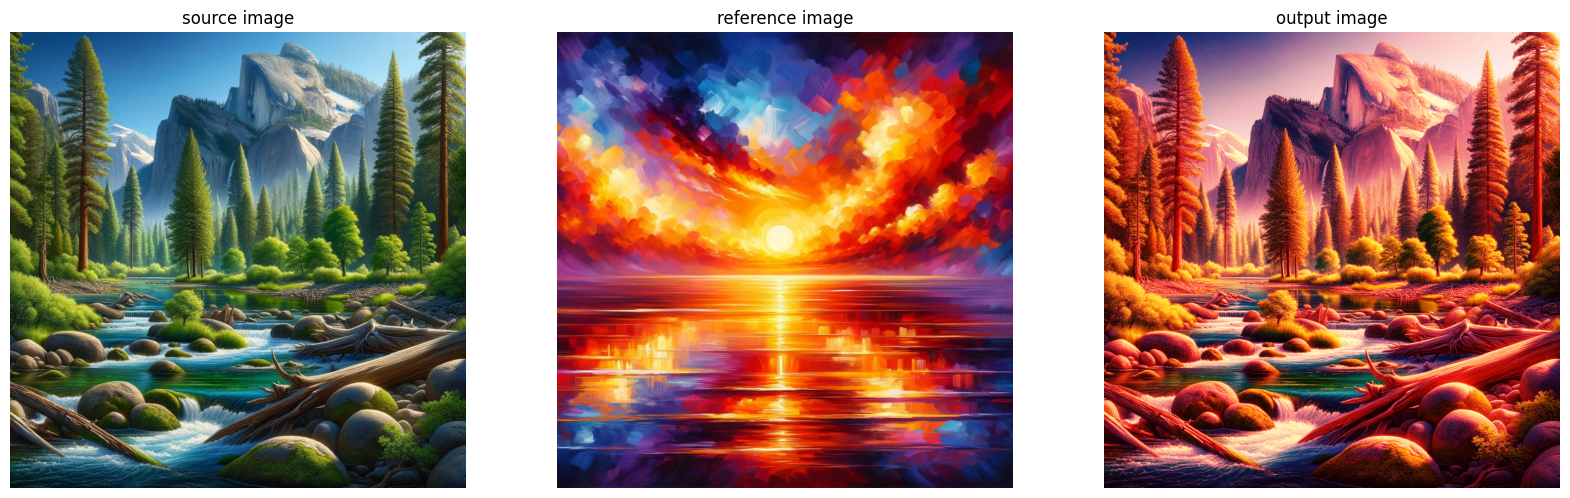

In [30]:
# Do not change this cell
src = cv2.imread('input.png')
ref = cv2.imread('ref.png')
Array = [src, ref, hist_matching(src,ref)]
titles = ['source image', 'reference image', 'output image']
plt.figure(figsize=(20,20))
for i in range(3):
  plt.subplot(1,3,i+1)
  plt.imshow(Array[i][:,:,::-1])
  plt.title(titles[i])
  plt.axis('off')

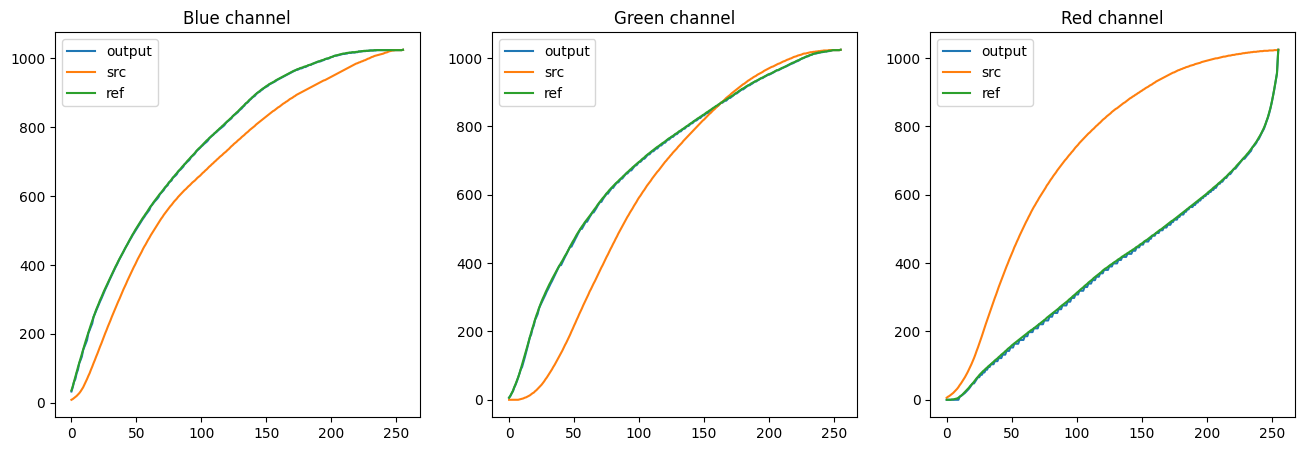

In [31]:
# Do not change this cell
fig = plt.figure(figsize= (16, 5))
channels = [(0, 'Blue channel'), (1, 'Green channel'), (2, 'Red channel')]
output = hist_matching(src,ref)
for channel, title in channels:
    fig.add_subplot(1, 3, channel+ 1)
    a = calc_cdf(output[:,:,channel])
    b = calc_cdf(src[:,:,channel])
    c = calc_cdf(ref[:,:,channel])
    plt.plot(a,label='output')
    plt.plot(b,label='src')
    plt.plot(c,label='ref')
    plt.legend()
    plt.title(title)

PART 1

In [32]:
src = [[0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2, 2, 2, 2],
       [2, 2, 2, 2, 2, 2, 2, 2],
       [2, 2, 2, 2, 2, 2, 2, 2],
       [1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1]]

ref = [[4, 7, 6, 5, 2, 5, 7, 3],
       [4, 7, 6, 5, 2, 5, 7, 3],
       [4, 7, 6, 5, 2, 5, 7, 3],
       [4, 7, 6, 5, 2, 5, 7, 3],
       [4, 7, 6, 5, 2, 5, 7, 3],
       [4, 7, 6, 5, 2, 5, 7, 3],
       [4, 7, 6, 5, 2, 5, 7, 3],
       [4, 7, 6, 5, 2, 5, 7, 3]]

In [37]:
import numpy as np

def calc_hist(image):
    '''Calculate the histogram of an image.'''
    hist = np.zeros(256, dtype=int)
    for value in image.flatten():
        hist[value] += 1
    return hist

def calc_cdf(hist):
    '''Calculate the cumulative distribution function from a histogram.'''
    cdf = hist.cumsum()
    cdf_normalized = cdf / cdf[-1]  # Normalize to range 0..1
    return cdf_normalized

def find_mapping(src_cdf, ref_cdf):
    '''Find the mapping for histogram matching.'''
    mapping = np.zeros(256, dtype=np.uint8)
    for src_intensity in range(256):
        # Find the closest value in ref_cdf to src_cdf[src_intensity]
        idx = np.abs(ref_cdf - src_cdf[src_intensity]).argmin()
        mapping[src_intensity] = idx
    return mapping

def apply_mapping(image, mapping):
    '''Apply the mapping to get the output image.'''
    return mapping[image]

# Assuming src and ref are your input numpy arrays
src = np.array([[0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2, 2, 2, 2],
       [2, 2, 2, 2, 2, 2, 2, 2],
       [2, 2, 2, 2, 2, 2, 2, 2],
       [1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1]])

ref = np.array([[4, 7, 6, 5, 2, 5, 7, 3],
       [4, 7, 6, 5, 2, 5, 7, 3],
       [4, 7, 6, 5, 2, 5, 7, 3],
       [4, 7, 6, 5, 2, 5, 7, 3],
       [4, 7, 6, 5, 2, 5, 7, 3],
       [4, 7, 6, 5, 2, 5, 7, 3],
       [4, 7, 6, 5, 2, 5, 7, 3],
       [4, 7, 6, 5, 2, 5, 7, 3]])
# Calculate histograms and CDFs
src_hist = calc_hist(src)
ref_hist = calc_hist(ref)
src_cdf = calc_cdf(src_hist)
ref_cdf = calc_cdf(ref_hist)

# Find the intensity mapping and apply it
mapping = find_mapping(src_cdf, ref_cdf)
matched_image = apply_mapping(src, mapping)

# matched_image is your histogram-matched image


In [36]:
matched_image

array([[2, 2, 2, 2, 2, 2, 2, 2],
       [5, 5, 5, 5, 5, 5, 5, 5],
       [5, 5, 5, 5, 5, 5, 5, 5],
       [7, 7, 7, 7, 7, 7, 7, 7],
       [7, 7, 7, 7, 7, 7, 7, 7],
       [7, 7, 7, 7, 7, 7, 7, 7],
       [5, 5, 5, 5, 5, 5, 5, 5],
       [5, 5, 5, 5, 5, 5, 5, 5]], dtype=uint8)